In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, InputLayer, Flatten, BatchNormalization, Input, Layer
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from google.colab import drive,files

In [ ]:
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised = True, shuffle_files = True, split = ['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteI8GXM2/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
for data in dataset[0].take(4):
  print(data)
  break

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [ ]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  dataset_size = len(dataset)
  train_dataset = dataset.take(int(TRAIN_RATIO*dataset_size))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO*dataset_size))
  val_dataset = val_test_dataset.take(int(VAL_RATIO*dataset_size))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*dataset_size))

  return train_dataset, val_dataset, test_dataset

In [ ]:
data = tf.data.Dataset.range(10)

Train_Ratio = 0.6
Val_Ratio = 0.2
Test_Ratio = 0.2
Train,Val,Test = splits(dataset[0],Train_Ratio,Val_Ratio,Test_Ratio)
print(list(Train.take(1).as_numpy_iterator()),
      list(Val.take(1).as_numpy_iterator()),
      list(Test.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [ ]:
IM_SIZE = 224
def rescale_resize(img,label):
  return tf.image.resize(img,(IM_SIZE,IM_SIZE))/255.0,label

In [ ]:
Train = Train.map(rescale_resize)
Val = Val.map(rescale_resize)
Test = Test.map(rescale_resize)

In [ ]:
for image,label in Train.take(1):
  print(image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


In [ ]:
Train = Train.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
Val = Val.shuffle(buffer_size = 8,reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

## Sequential API

In [ ]:
malaria_model = tf.keras.Sequential([

    InputLayer(input_shape = (IM_SIZE, IM_SIZE,3)),

    tf.keras.layers.Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = "relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = "relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),
    Dense(100, activation = "relu"),
    BatchNormalization(),

    Dense(10, activation = "relu"),
    BatchNormalization(),

    Dense(1, activation = "sigmoid"),
])
malaria_model.summary()
malaria_model.input_shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

(None, 224, 224, 3)

### Functional API

In [ ]:
feature_extractor_seq_model = tf.keras.Sequential([

    InputLayer(input_shape = (IM_SIZE, IM_SIZE,3)),

    tf.keras.layers.Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = "relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = "relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

])
feature_extractor_seq_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_16 (Ba  (None, 222, 222, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_17 (Ba  (None, 109, 109, 16)      64        
 tchNormalization)                                               
                                                        

In [ ]:
func_input = Input(shape = (IM_SIZE, IM_SIZE,3), name = "Input Image")

x = Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = "relu")(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = 2, strides = 2)(x)

x = Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = "relu")(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size = 2, strides = 2)(x)

feature_extractor_model = Model(func_input, output, name = "Feature_Extractor")
feature_extractor_model.summary()

Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_12 (Ba  (None, 222, 222, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_13 (Ba  (None, 109, 109, 16)

## Callable Model

In [ ]:
func_input = Input(shape = (IM_SIZE, IM_SIZE,3), name = "Input Image")

x = feature_extractor_seq_model(func_input)

x = Flatten()(x)

x = Dense(100, activation = "relu")(x)
x = BatchNormalization()(x)

x = Dense(10, activation = "relu")(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation = "sigmoid")(x)

malaria_model_func = Model(func_input, func_output, name = "Malaria_Model")
malaria_model_func.summary()

Model: "Malaria_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 54, 54, 16)        1136      
                                                                 
 flatten_4 (Flatten)         (None, 46656)             0         
                                                                 
 dense_12 (Dense)            (None, 100)               4665700   
                                                                 
 batch_normalization_18 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                     

## Model Subclassing

In [ ]:
class FeatureExtractor(Layer):
  def __init__(self, filters, kernel_size, strides, padding,activation,pool_size):
    super(FeatureExtractor, self).__init__()

    self.conv_1 = Conv2D(filters = filters, kernel_size = kernel_size, strides = strides, padding =  padding, activation = activation)
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size = pool_size, strides = 2*strides)

    self.conv_2 = Conv2D(filters = filters*2, kernel_size = kernel_size, strides = strides, padding =  padding, activation = activation)
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size = pool_size, strides = 2*strides)

  def call(self, x, training):
    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)

    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x

feature_sub_classed = FeatureExtractor(8,3, 1,"valid","relu",2)


In [ ]:
func_input = Input(shape = (IM_SIZE, IM_SIZE,3), name = "Input Image")

x = feature_sub_classed(func_input)

x = Flatten()(x)

x = Dense(100, activation = "relu")(x)
x = BatchNormalization()(x)

x = Dense(10, activation = "relu")(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation = "sigmoid")(x)

malaria_model_func = Model(func_input, func_output, name = "Malaria_Model")
malaria_model_func.summary()

Model: "Malaria_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 feature_extractor_1 (Featu  (None, 54, 54, 16)        1488      
 reExtractor)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_6 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 10)              

In [ ]:
class MalariaModel(Model):
  def __init__(self):
    super(MalariaModel, self).__init__()

    self.feature_extractor = FeatureExtractor(8,3, 1,"valid","relu",2)

    self.flatten = Flatten()
    self.dense_1 = Dense(100, activation = "relu")
    self.batch_1 = BatchNormalization()

    self.dense_2 = Dense(10, activation = "relu")
    self.batch_2 = BatchNormalization()

    self.dense_3 = Dense(1, activation = "sigmoid")

  def call(self, x, training):
    x = self.feature_extractor(x)
    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch_1(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x

Malaria_sub_classed = MalariaModel()
Malaria_sub_classed(tf.zeros([1,224,224,3]))
Malaria_sub_classed.summary()




Model: "malaria_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_4 (Featu  multiple                  1488      
 reExtractor)                                                    
                                                                 
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_9 (Dense)             multiple                  4665700   
                                                                 
 batch_normalization_16 (Ba  multiple                  400       
 tchNormalization)                                               
                                                                 
 dense_10 (Dense)            multiple                  1010      
                                                                 
 batch_normalization_17 (Ba  multiple              

## Custom Layers

In [ ]:
class NeuralearnDense(Layer):
  def __init__(self, output_units,activation):
    super(NeuralearnDense, self).__init__()
    self.output_units = output_units
    self.activation = activation

  def build(self,input_features_shape):
    self.w = self.add_weight(shape = (input_features_shape[-1], self.output_units),initializer = "random_normal" ,trainable = True)
    self.b = self.add_weight(shape = (self.output_units,),initializer = "random_normal" ,trainable = True)

  def call(self, input_features):
    pre_output = tf.matmul(input_features, self.w) + self.b
    if(self.activation == "relu"):
      return tf.nn.relu(pre_output)

    elif(self.activation == "sigmoid"):
      return tf.math.sigmoid(pre_output)

    else:
      return pre_output

In [ ]:
IM_SIZE = 224
malaria_custom_model = tf.keras.Sequential([

    InputLayer(input_shape = (IM_SIZE, IM_SIZE,3)),

    tf.keras.layers.Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = "relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = "relu"),
    BatchNormalization(),
    MaxPool2D(pool_size = 2, strides = 2),

    Flatten(),
    NeuralearnDense(100, activation = "relu"),
    BatchNormalization(),

    NeuralearnDense(10, activation = "relu"),
    BatchNormalization(),

    NeuralearnDense(1, activation = "sigmoid"),
])
malaria_custom_model.summary()
malaria_custom_model.input_shape

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_40 (Ba  (None, 222, 222, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 111, 111, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_41 (Ba  (None, 109, 109, 16)      64        
 tchNormalization)                                               
                                                     

(None, 224, 224, 3)

### Model Training

In [ ]:
y_true = [0,1,0,0]
y_pred = [0.6,0.51,0.94,1]
bce = tf.keras.losses.BinaryCrossentropy(from_logits = False)
bce(y_true,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4.9340706>

In [ ]:
malaria_custom_model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy')

In [ ]:
history = malaria_custom_model.fit(Train, validation_data=Val, epochs=5, verbose = 1 )

Epoch 1/5
517/517 [==============================] - 46s 74ms/step - loss: 0.4347 - accuracy: 0.8029 - val_loss: 0.6192 - val_accuracy: 0.8461
Epoch 2/5
517/517 [==============================] - 37s 71ms/step - loss: 0.2744 - accuracy: 0.9067 - val_loss: 2.1456 - val_accuracy: 0.4990
Epoch 3/5
517/517 [==============================] - 38s 74ms/step - loss: 0.2420 - accuracy: 0.9227 - val_loss: 0.9690 - val_accuracy: 0.4912
Epoch 4/5
517/517 [==============================] - 36s 70ms/step - loss: 0.2191 - accuracy: 0.9334 - val_loss: 0.5562 - val_accuracy: 0.8621
Epoch 5/5
517/517 [==============================] - 36s 70ms/step - loss: 0.2136 - accuracy: 0.9344 - val_loss: 0.2199 - val_accuracy: 0.9361


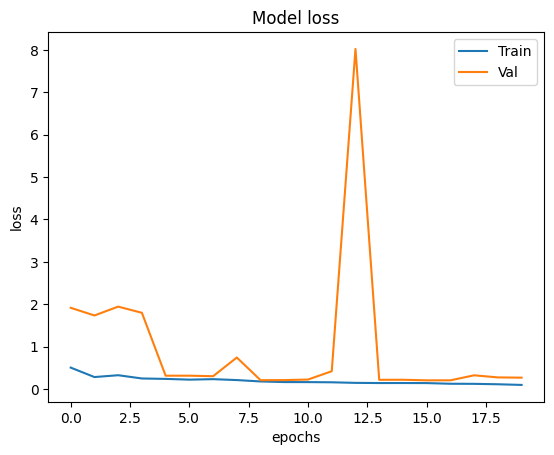

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'])
plt.show()

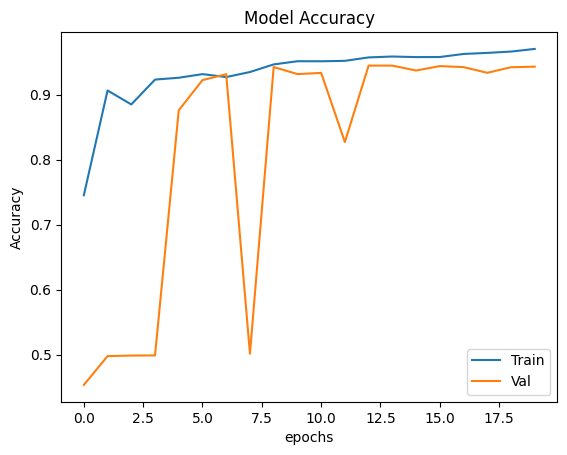

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Val'])
plt.show()

In [ ]:
Test = Test.batch(1)

In [ ]:
malaria_model_func.evaluate(Test)

5513/5513 [==============================] - 27s 3ms/step - loss: 0.2380 - accuracy: 0.9441


[0.23801396787166595, 0.9441320300102234]

In [ ]:
def par_or_not(res):
  if res<0.5:
    return str('P')
  return str('U')

In [ ]:
par_or_not(malaria_model_func.predict(Test.take(1))[0][0])

1/1 [==============================] - 10s 10s/step


'P'

1/1 [==============================] - 0s 18ms/step


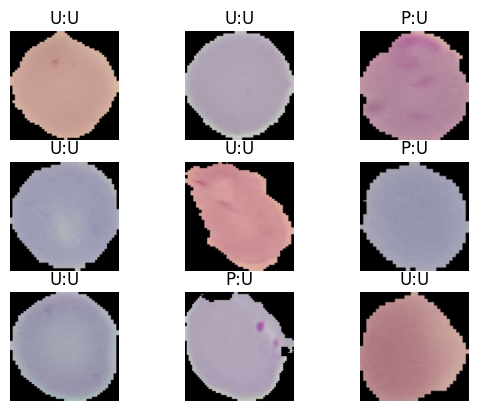

In [ ]:
for i, (image,label) in enumerate(Test.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(par_or_not(label.numpy()[0]))+":"+str(par_or_not(malaria_model_func.predict(image)[0][0])))

  plt.axis('off')

# **Saving and Loading**

In [ ]:
malaria_model_func.save('malaria_func')

ValueError: Got non-flat/non-unique argument names for SavedModel signature 'serving_default': more than one argument to '__inference_signature_wrapper_86952' was named 'Input Image'. Signatures have one Tensor per named input, so to have predictable names Python functions used to generate these signatures should avoid *args and Tensors in nested structures unless unique names are specified for each. Use tf.TensorSpec(..., name=...) to provide a name for a Tensor input.

In [ ]:
malaria_loaded_model = tf.keras.models.load_model("malaria_cv")
malaria_loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [ ]:
malaria_model.save("malaria.hdf5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
malaria_loaded_model = tf.keras.models.load_model("malaria.hdf5")
malaria_loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

In [ ]:
malaria_model.save_weights("weights/lenet_weights")

In [ ]:
malaria_weights_model = malaria_model.load_weights("weights/lenet_weights")

## Saving and Loading from Google Drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!cp -r /content/malaria_func.h5 /content/drive/MyDrive/malaria_colab/  #copy contents of malaria_cv to mydrive/malaria_collab

In [ ]:
!cp -r /content/drive/MyDrive/malaria_colab/ /content/malaria_colab/   #copy contents of mydrive/malaria_collab to malaria_cv

In [ ]:
files.download('malaria_func.h5') #to download locally

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
malaria_model.save('/content/drive/My Drive/malaria_func.h5') #to actually save(not copy) model in drive

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
